In [167]:
import geopandas as gpd
import pandas as pd
from datetime import datetime

In [168]:
df = pd.read_csv("Neighborhood_zhvi_uc_sfr_sm_sa_month.csv")
condos = pd.read_csv("Neighborhood_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv")

In [169]:
df = df[df['State'] == 'CA']
condos = condos[condos['State'] == 'CA']

In [172]:
def city_time_series(City, df):
    city = df[df['City'] == City]
    times_series = city[
        city.columns[pd.Series(city.columns).str.match(r"\d\d\d\d-\d\d-\d\d")]
    ].T
    times_series.columns = city['RegionName']
    return times_series

def report(city, start):
    years = (datetime.now() - pd.to_datetime(start)).days / 365.25
    return pd.DataFrame({
        'pct_change': city.loc[start:].pct_change().dropna().add(1).cumprod().add(-1).iloc[-1],
        'mean_growth': city.loc[start:].pct_change().dropna().add(1).cumprod().add(-1).iloc[-1] / years,
        'dollar_change': city.loc[start:].diff().dropna().cumsum().iloc[-1],
        'starting_price': city.loc[start],
        'ending_price': city.iloc[-1]
    }).sort_values(by='pct_change')

In [176]:
berkeley_condos = city_time_series("Berkeley", condos)
berkeley_sfh = city_time_series("Berkeley", df)
first_richmond_date = berkeley_condos.dropna().iloc[0].name
date = "2015-01-31"
report(berkeley_condos, first_richmond_date)

,pct_change,mean_growth,dollar_change,starting_price,ending_price
RegionName,,,,,
North Campus,0.464578,0.041908,260007.148017,559663.444190,819670.592207
Telegraph,0.539752,0.048690,224985.129440,416830.943596,641816.073035
Gourmet Ghetto,0.569327,0.051358,275339.062701,483622.160466,758961.223167
Northwest Berkeley,0.597346,0.053885,256408.006904,429245.654085,685653.660989
Berkeley Hills,0.637785,0.057533,388187.570302,608649.692047,996837.262349
Ashby,0.645310,0.058212,274700.435455,425687.338466,700387.773921
Elmwood,0.723767,0.065289,325087.600340,449160.366541,774247.966881
North Berkeley,0.870981,0.078569,330673.232409,379655.961736,710329.194146


In [187]:
report(berkeley_condos, first_richmond_date)[['pct_change', 'mean_growth', 'dollar_change']].merge(report(berkeley_sfh, first_richmond_date)[['pct_change', 'mean_growth', 'dollar_change']], left_index=True, right_index=True)

,pct_change_x,mean_growth_x,dollar_change_x,pct_change_y,mean_growth_y,dollar_change_y
RegionName,,,,,,
North Campus,0.464578,0.041908,260007.148017,0.500934,0.045188,534671.681355
Telegraph,0.539752,0.048690,224985.129440,0.773409,0.069767,614043.104557
Gourmet Ghetto,0.569327,0.051358,275339.062701,0.602192,0.054322,576207.916215
Northwest Berkeley,0.597346,0.053885,256408.006904,0.873727,0.078817,521500.258782
Berkeley Hills,0.637785,0.057533,388187.570302,0.700583,0.063198,694082.706958
Ashby,0.645310,0.058212,274700.435455,0.939390,0.084740,547557.022870
Elmwood,0.723767,0.065289,325087.600340,0.715942,0.064583,910957.835908
North Berkeley,0.870981,0.078569,330673.232409,0.813860,0.073416,579852.930393


<AxesSubplot:>

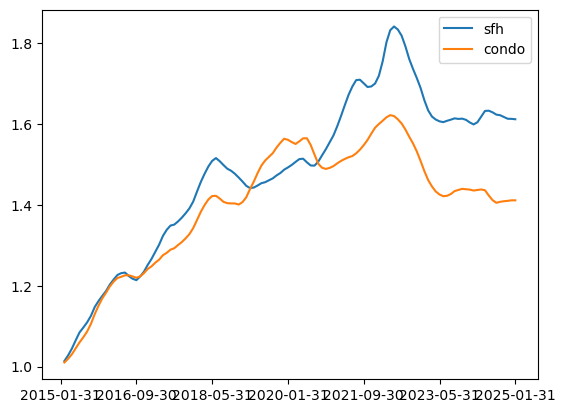

In [185]:
nb = 'Northwest Berkeley'
pd.DataFrame([berkeley_sfh[nb].rename('sfh'), berkeley_condos[nb].rename("condo")]).T.dropna().loc[date:].pct_change().add(1).cumprod().plot()